In [ ]:
# 윈도우
%matplotlib notebook
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib.font_manager import fontManager
import squarify
import matplotlib

for font in fontManager.ttflist:
    if 'Na' in font.name:
        print(font.name)
        
warnings.filterwarnings(action='ignore')
plt.rc('font', family='08SeoulNamsan')
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

In [1]:
#맥
import pandas as pd
import warnings
import numpy as np
import os
import matplotlib
from scipy import stats
from matplotlib.image import imread
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import squarify 
from matplotlib import rc
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore')

os.chdir('/Users/hankiho/Downloads/weather-master/유통&소셜 데이터')

In [2]:
weather = pd.read_csv("weather.csv", encoding ='CP949', parse_dates=['date.wt'])
weather_seoul = weather[weather['region_01.wt']=='서울특별시'] 
gs = pd.read_csv("gs.csv", encoding ='CP949', parse_dates=['date.gs'])
gs_seoul = gs[gs['reg_01.gs']=='서울특별시']
la = pd.read_csv("lala.csv", encoding ='CP949', parse_dates=['date.la'])
la_seoul = la[la['reg_01.la']=='서울특별시']
yellowdust = pd.read_csv('yellowdust.csv', encoding='cp949', skiprows = [0,1,2], parse_dates=['일자'])
yellowdust = yellowdust[yellowdust['지점명']=='서울'] 

In [3]:
# 칼럼별 이름 변경
weather_seoul.rename(columns={weather_seoul.columns[0] : '날짜',
                        weather_seoul.columns[1] : '지역번호',
                        weather_seoul.columns[2] : '지역',
                        weather_seoul.columns[3] : '지역구',
                        weather_seoul.columns[4] : '최대기온',
                        weather_seoul.columns[5] : '최대풍속',
                        weather_seoul.columns[6] : '최소기온',
                        weather_seoul.columns[7] : '평균기온',
                        weather_seoul.columns[8] : '평균상대습도',
                        weather_seoul.columns[9] : '평균풍속',
                        weather_seoul.columns[10] : '총강수량'}, inplace=True)
yellowdust.rename(columns={'일자':'날짜'}, inplace=True) # 칼럼 이름 변경
yellowdust.drop(['지점번호', '지점명'], axis=1, inplace=True) # 필요없는 칼럼 삭제

In [4]:
weather_seoul.drop('평균상대습도', axis=1, inplace=True) # 거의 절반 정도로 결측치가 많은 평균상대습도 변수 제거
weather_seoul = weather_seoul.interpolate(method='values') # 데이터 프레임 값에 선형으로 비례하는 결측값 보간

In [5]:
def rainfall(x):
    if x==0:
        return 'N'
    else:
        return 'Y' # 강수량이 0이면 'N', 아니면 'Y'로 표시

In [6]:
weather_seoul['강수유무'] = weather_seoul['총강수량'].apply(rainfall) # 강수유무 칼럼 추가

In [7]:
weather_seoul['일교차'] = weather_seoul['최대기온'] - weather_seoul['최소기온'] # 일교차(최대기온-최소기온) 변수 추가

In [8]:
weather_avg = weather_seoul.groupby(['날짜']).mean()
weather_avg.reset_index(inplace=True)

In [9]:
weather_avg = pd.merge(weather_avg, yellowdust,how='outer') # 미세먼지농도 변수 추가

In [10]:
weekday_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
weather_avg = weather_avg.replace({'dayofweek':weekday_dict})
# 미세먼지 결측치 보간
weather_avg['미세먼지농도(㎍/㎥)'] = weather_avg['미세먼지농도(㎍/㎥)'].interpolate(method='values')

In [11]:
weather_avg.head() # 요일 문자열로

,날짜,지역번호,최대기온,최대풍속,최소기온,평균기온,평균풍속,총강수량,일교차,미세먼지농도(㎍/㎥)
0,2016-01-01,406.68,4.928,2.608,-2.576,1.832,0.980,0.0,7.504,56.0
1,2016-01-02,406.68,10.088,3.100,2.572,6.472,1.296,0.0,7.516,42.0
2,2016-01-03,406.68,9.516,2.648,4.468,6.592,0.924,0.0,5.048,86.0
3,2016-01-04,406.68,6.784,4.120,-2.060,2.800,2.132,0.0,8.844,73.0
4,2016-01-05,406.68,1.592,3.660,-3.824,-1.760,1.704,0.0,5.416,31.0


In [12]:
len (weather_avg)

1096

In [13]:
weather_avg.isnull().sum()

날짜             0
지역번호           0
최대기온           0
최대풍속           0
최소기온           0
평균기온           0
평균풍속           0
총강수량           0
일교차            0
미세먼지농도(㎍/㎥)    0
dtype: int64

In [14]:
#weather_avg.to_csv('/Users/hankiho/Desktop/weather_avg.csv', index = False, encoding = "utf-8-sig")

In [15]:
dust = pd.read_csv('dust.csv', encoding = 'cp949', parse_dates = ['social_pm.date'])
food = pd.read_csv('food.csv', encoding = 'cp949', parse_dates = ['social_br.date'])
hobby = pd.read_csv('hobby.csv', encoding = 'cp949', parse_dates = ['social_hobby.date'])
health = pd.read_csv('health.csv', encoding = 'cp949', parse_dates = ['social_health.date'])
date = pd.read_csv('date.csv', encoding = 'cp949', parse_dates = ['social_date.date'])

In [16]:
dust.rename(columns={dust.columns[0] : '번호',
                       dust.columns[1] : '날짜',
                       dust.columns[2] : '블로그',
                       dust.columns[3] : '트위터',
                       dust.columns[4] : '기사',
                       dust.columns[5] : '전체'}, inplace=True) # 칼럼별 이름 변경

food.rename(columns={food.columns[0] : '번호',
                       food.columns[1] : '날짜',
                       food.columns[2] : '블로그',
                       food.columns[3] : '트위터',
                       food.columns[4] : '기사',
                       food.columns[5] : '전체'}, inplace=True) # 칼럼별 이름 변경

hobby.rename(columns={hobby.columns[0] : '번호',
                       hobby.columns[1] : '날짜',
                       hobby.columns[2] : '블로그',
                       hobby.columns[3] : '트위터',
                       hobby.columns[4] : '기사',
                       hobby.columns[5] : '전체'}, inplace=True) # 칼럼별 이름 변경

health.rename(columns={health.columns[0] : '번호',
                       health.columns[1] : '날짜',
                       health.columns[2] : '블로그',
                       health.columns[3] : '트위터',
                       health.columns[4] : '기사',
                       health.columns[5] : '전체'}, inplace=True) # 칼럼별 이름 변경

date.rename(columns={date.columns[0] : '번호',
                       date.columns[1] : '날짜',
                       date.columns[2] : '블로그',
                       date.columns[3] : '트위터',
                       date.columns[4] : '기사',
                       date.columns[5] : '전체'}, inplace=True) # 칼럼별 이름 변경

gs_seoul.rename(columns={gs_seoul.columns[0] : '지역',
                  gs_seoul.columns[1] : '날짜',
                  gs_seoul.columns[2] : '성별',
                  gs_seoul.columns[3] : '나이',
                  gs_seoul.columns[4] : '품목',
                  gs_seoul.columns[5] : '수량',
                  gs_seoul.columns[6] : '지역구'}, inplace=True)

la_seoul.rename(columns={la_seoul.columns[0] : '지역',
                  la_seoul.columns[1] : '지역구',
                  la_seoul.columns[2] : '날짜',
                  la_seoul.columns[3] : '성별',
                  la_seoul.columns[4] : '나이',
                  la_seoul.columns[5] : '품목',
                  la_seoul.columns[6] : '수량'}, inplace=True)

In [17]:
# 언급량 데이터 쓸데업는 날리기.
dust.drop(['번호','블로그', '트위터', '기사'], axis=1, inplace=True)
food.drop(['번호','블로그', '트위터', '기사'], axis=1, inplace=True)
hobby.drop(['번호','블로그', '트위터', '기사'], axis=1, inplace=True)
health.drop(['번호','블로그', '트위터', '기사'], axis=1, inplace=True)
date.drop(['번호','블로그', '트위터', '기사'], axis=1, inplace=True)

In [18]:
dust = dust.rename(columns = {'전체':'미세먼지언급량'})
food = food.rename(columns = {'전체':'맛집언급량'})
hobby = hobby.rename(columns = {'전체':'취미언급량'})
health = health.rename(columns = {'전체':'건강언급량'})
date = date.rename(columns = {'전체':'데이트언급량'})

In [19]:
gs_cat = gs_seoul.groupby(['날짜', '품목'])['수량'].sum().unstack()
la_cat = la_seoul.groupby(['날짜', '품목'])['수량'].sum().unstack()

In [20]:
gs_cat.head()

품목,과자,라면,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,우산,탄산음료
날짜,,,,,,,,,,,,
2016-01-01,45293.0,19183.0,266.0,12811.0,343.0,1993.0,6269.0,2783.0,638.0,15929.0,7.0,3480.0
2016-01-02,39214.0,18897.0,154.0,11813.0,315.0,1833.0,6004.0,2549.0,820.0,13086.0,21.0,3103.0
2016-01-03,36347.0,19335.0,329.0,11476.0,329.0,1423.0,5365.0,2057.0,917.0,14667.0,7.0,3089.0
2016-01-04,30274.0,20782.0,441.0,8663.0,245.0,1996.0,7022.0,1600.0,996.0,8596.0,7.0,3216.0
2016-01-05,31962.0,21753.0,280.0,8497.0,203.0,1818.0,6060.0,2253.0,842.0,8602.0,NaN,2878.0


In [21]:
la_cat.head()

품목,네일,립컬러,립케어,마스크팩,바디로션,선케어,제모제,체중조절,크림로션,훼이셜클렌저
날짜,,,,,,,,,,
2016-01-01,1491.0,6260.0,6192.0,35566.0,6444.0,689.0,72.0,1307.0,5531.0,6592.0
2016-01-02,1853.0,7065.0,10570.0,76466.0,8378.0,831.0,145.0,1635.0,12502.0,7466.0
2016-01-03,1673.0,6845.0,7648.0,66757.0,8123.0,615.0,108.0,2112.0,8927.0,7542.0
2016-01-04,1783.0,7137.0,9032.0,76978.0,9251.0,688.0,290.0,1417.0,10424.0,8054.0
2016-01-05,1238.0,6883.0,7356.0,74894.0,8819.0,651.0,108.0,1563.0,10603.0,7906.0


In [22]:
# 데이터 합치기
a = pd.merge(gs_cat, la_cat, on='날짜') 
b = pd.merge(dust, food, on='날짜')
c = pd.merge(hobby, health, on='날짜')
d = pd.merge(date, weather_avg, on='날짜')

e = pd.merge(a, b, on='날짜')
f = pd.merge(c, d, on='날짜')

df = pd.merge(e, f, on='날짜')

In [23]:
df.columns

Index(['날짜', '과자', '라면', '마스크', '맥주', '면도기', '생리대', '생수', '숙취해소제', '스타킹',
       '아이스크림', '우산', '탄산음료', '네일', '립컬러', '립케어', '마스크팩', '바디로션', '선케어', '제모제',
       '체중조절', '크림로션', '훼이셜클렌저', '미세먼지언급량', '맛집언급량', '취미언급량', '건강언급량',
       '데이트언급량', '지역번호', '최대기온', '최대풍속', '최소기온', '평균기온', '평균풍속', '총강수량', '일교차',
       '미세먼지농도(㎍/㎥)'],
      dtype='object')

In [24]:
# 상관계수
df.corr() 

,과자,라면,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,...,데이트언급량,지역번호,최대기온,최대풍속,최소기온,평균기온,평균풍속,총강수량,일교차,미세먼지농도(㎍/㎥)
과자,1.000000,0.419482,-0.042972,0.565583,0.442636,0.398425,0.296652,0.411970,0.203705,0.259091,...,0.179164,0.044389,0.011337,0.094962,0.028611,0.018159,0.084196,0.065273,-0.070756,0.095559
라면,0.419482,1.000000,-0.003616,0.015523,0.192880,0.417174,0.076333,0.357362,0.320330,-0.183505,...,0.203046,0.040172,-0.275357,0.081036,-0.243204,-0.263365,0.108153,0.063015,-0.163098,0.088613
마스크,-0.042972,-0.003616,1.000000,-0.240557,-0.141507,-0.129487,-0.148423,-0.011979,0.170628,-0.229475,...,0.032716,0.017821,-0.202101,0.045903,-0.220150,-0.213905,0.014295,-0.094359,0.053785,0.584022
맥주,0.565583,0.015523,-0.240557,1.000000,0.455881,0.449402,0.564957,0.322388,-0.099484,0.702701,...,-0.059447,0.029742,0.574929,-0.157452,0.586403,0.585335,-0.156439,0.050083,0.013084,-0.158646
면도기,0.442636,0.192880,-0.141507,0.455881,1.000000,0.452703,0.381969,0.303289,0.151411,0.377462,...,0.098284,0.064077,0.255616,-0.040590,0.247859,0.252339,-0.046068,-0.045259,0.059383,0.018152
생리대,0.398425,0.417174,-0.129487,0.449402,0.452703,1.000000,0.545076,0.422060,0.300991,0.429525,...,0.231662,0.034467,0.356721,-0.031744,0.339325,0.349700,-0.040227,-0.070993,0.110238,0.040801
생수,0.296652,0.076333,-0.148423,0.564957,0.381969,0.545076,1.000000,0.347495,0.129469,0.628431,...,0.037969,0.053522,0.651752,-0.130631,0.612411,0.635934,-0.160407,-0.119238,0.232897,-0.077177
숙취해소제,0.411970,0.357362,-0.011979,0.322388,0.303289,0.422060,0.347495,1.000000,0.376327,0.050283,...,-0.074989,0.034982,0.004657,-0.082563,-0.016600,-0.003802,-0.084779,-0.120130,0.089040,0.126443
스타킹,0.203705,0.320330,0.170628,-0.099484,0.151411,0.300991,0.129469,0.376327,1.000000,-0.304981,...,0.138788,0.025914,-0.144106,0.125846,-0.217987,-0.184448,0.069257,-0.127182,0.292500,0.355839
아이스크림,0.259091,-0.183505,-0.229475,0.702701,0.377462,0.429525,0.628431,0.050283,-0.304981,1.000000,...,-0.004468,0.049634,0.839793,-0.101086,0.825512,0.838546,-0.122545,0.012692,0.148417,-0.154723


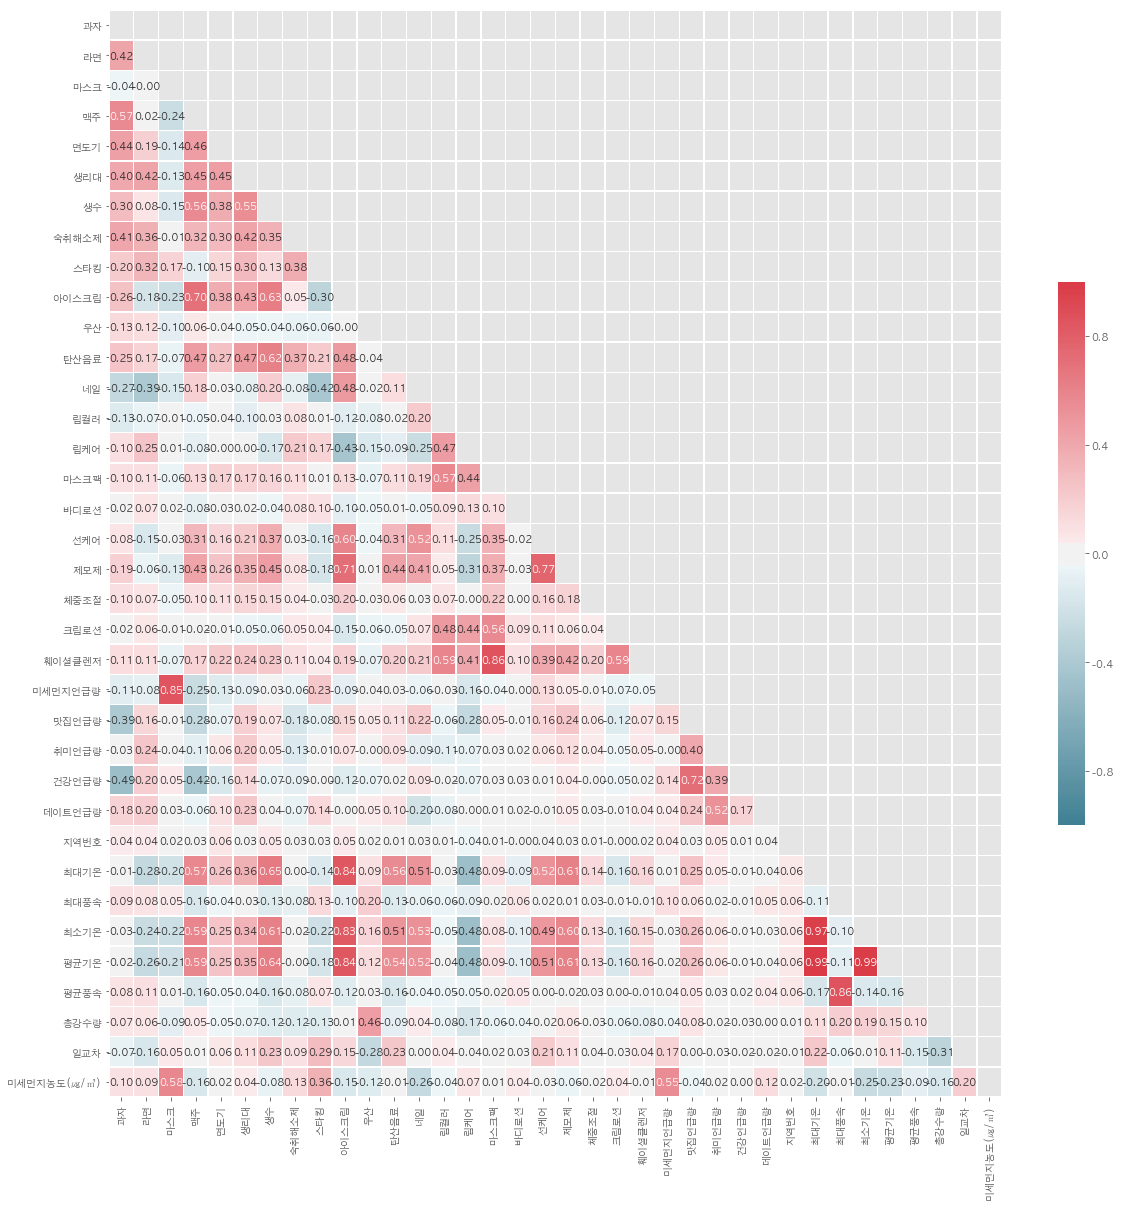

In [26]:
# 시각화
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), mask=mask,  cmap=cmap, cbar_kws={"shrink": 0.5}, 
            annot=True, annot_kws={"size": 10}, 
            vmax=1, vmin=-1, center=0,  linewidths=.5, fmt='.2f')
plt.savefig("/Users/hankiho/Downloads/lineexamples.png", dpi=350)
plt.show() 

In [132]:
# 데이터 저장
df.to_csv('/Users/hankiho/Desktop/hitmap.csv', index = False, encoding = "utf-8-sig")